## MDS18. ДЗ 05 Математический анализ. Функции нескольких переменных

### 1. Вычислить вектор градиента и матрицу Гессе для функции f(x):

In [1]:
import sympy as sym
from sympy.matrices import Matrix

In [2]:
f       = sym.Symbol('f')
x1      = sym.Symbol('x1')
x2      = sym.Symbol('x2')
x3      = sym.Symbol('x3')
Grad    = sym.Symbol('Grad')
Hessian = sym.Symbol('Hessian')

In [3]:
f = 2*x1**3 - 3*x1*x2 + 2*x2*x3**2 - x2**3
f

2*x1**3 - 3*x1*x2 - x2**3 + 2*x2*x3**2

#### Сначала посчитаем градиент вручную:

In [4]:
Grad = Matrix([[2*3*x1**(3-1) - 3*x1**(1-1)*x2],
               [-3*x1*x2**(1-1) + 2*x2**(1-1)*x3**2 - 3*x2**(3-1)], 
               [2*2*x2*x3**(2-1)]])
Grad

Matrix([
[           6*x1**2 - 3*x2],
[-3*x1 - 3*x2**2 + 2*x3**2],
[                  4*x2*x3]])

#### Теперь найдем градиент, но уже с помощью sympy:

In [5]:
Grad = Matrix([[sym.diff(f,x1)],
               [sym.diff(f,x2)], 
               [sym.diff(f,x3)]])
Grad

Matrix([
[           6*x1**2 - 3*x2],
[-3*x1 - 3*x2**2 + 2*x3**2],
[                  4*x2*x3]])

оба решения чудесным образом совпали, вычисляем градиент в точке M=(2,1,1):

In [6]:
Grad.subs([(x1, 2), (x2, 1), (x3, 1)])

Matrix([
[21],
[-7],
[ 4]])

#### Теперь вручную посчитаем матрицу Гессе :( 

In [7]:
Hessian = Matrix([[(6*2*x1**(2-1)), (-3*x2**(1-1)), 0], 
                  [(-3*x1**(1-1)), (-3*2*x2**(2-1)), (2*2*x3**(2-1))], 
                  [0, (4*x2**(1-1)*x3), (4*x2*x3**(1-1))]])
Hessian

Matrix([
[12*x1,    -3,    0],
[   -3, -6*x2, 4*x3],
[    0,  4*x3, 4*x2]])

####  Посчитаем матрицу Гессе с помощью sympy :)

In [8]:
Hessian = Matrix([[(sym.diff(f,x1,x1)), (sym.diff(f,x1,x2)), (sym.diff(f,x1,x3))], 
                  [(sym.diff(f,x2,x1)), (sym.diff(f,x2,x2)), (sym.diff(f,x2,x3))], 
                  [(sym.diff(f,x3,x1)), (sym.diff(f,x3,x2)), (sym.diff(f,x3,x3))]])
Hessian

Matrix([
[12*x1,    -3,    0],
[   -3, -6*x2, 4*x3],
[    0,  4*x3, 4*x2]])

решения вновь чудесным образом совпали, вычисляем матрицу Гессе в точке M=(2,1,1):

In [9]:
Hessian.subs([(x1, 2), (x2, 1), (x3, 1)])

Matrix([
[24, -3, 0],
[-3, -6, 4],
[ 0,  4, 4]])

### 2.1 Постройте трехмерный график функции f(x):

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

определяем заданную функцию как func01:

In [11]:
def func01(x,y):
    return x2**2-(x1**2)*x2+2*x1*x2

готовим данные для графика: создаем масссив аргументов x1 и x2 от -2 до 4 с интервалом 0.01, 
а также x3 как значения func01(x,y):

In [12]:
x1 = np.arange(-2, 4, 0.01)
x2 = np.arange(-2, 4, 0.01)
x1, x2 = np.meshgrid(x1, x2)
x3 = func01(x1,x2)

строим график:

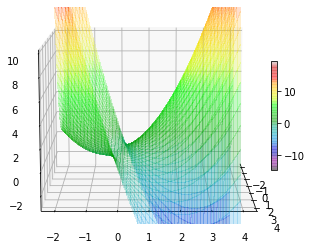

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x1, x2, x3, cmap=cm.nipy_spectral,
                       linewidth=1, antialiased=False,alpha=0.2)

ax.set_zlim(-3, 10.0)

fig.colorbar(surf, shrink=0.5, aspect=20)

ax.azim = 0
ax.dist = 7
ax.elev = 10

plt.show()

### 2.1 Постройте график линий уровня с уровнями {1,5,10}:

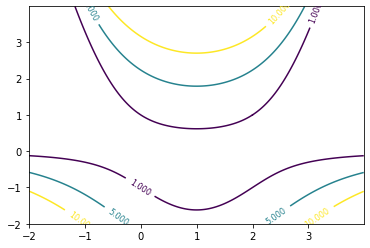

In [14]:
fig, ax = plt.subplots();
CS = ax.contour(x1, x2, x3,[1,5,10]);
ax.clabel(CS,inline=True, fontsize=8);

для интереса можно построить график с большим числом линий уровня (скажем, 20) - matplotlib сам определит значения:

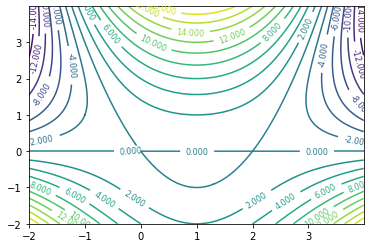

In [15]:
fig, ax = plt.subplots()
CS = ax.contour(x1, x2, x3,20)
ax.clabel(CS,inline=True, fontsize=8);